# Comparing different clustering methods on toy datasets
The purpose of this script is to review the performance of different clustering techniques when applied to toy datasets of different shapes and properties.

Useful links:

*   https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
*   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html






In [ ]:
# We import the necessary libraries
import time # This module provides various time-related functions
import warnings # Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
from itertools import cycle, islice # This module implements a number of iterator building blocks

In [ ]:
# We create the datasets
n_samples = 1500
X_circles, y_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05) # noise: Standard deviation of Gaussian noise added to the data # factor: Scale factor between inner and outer circle in the range (0, 1).
X_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X_blobs, y_blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X_no_structure, y_no_structure = np.random.rand(n_samples, 2), None


In [ ]:
# Dataset with points distributed along different axes
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Blobs dataset with varied variances
X_varied, y_varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

<ipython-input-4-4c9286f7e4c1>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_circles[:,0], X_circles[:,1], cmap='Accent', s=70)


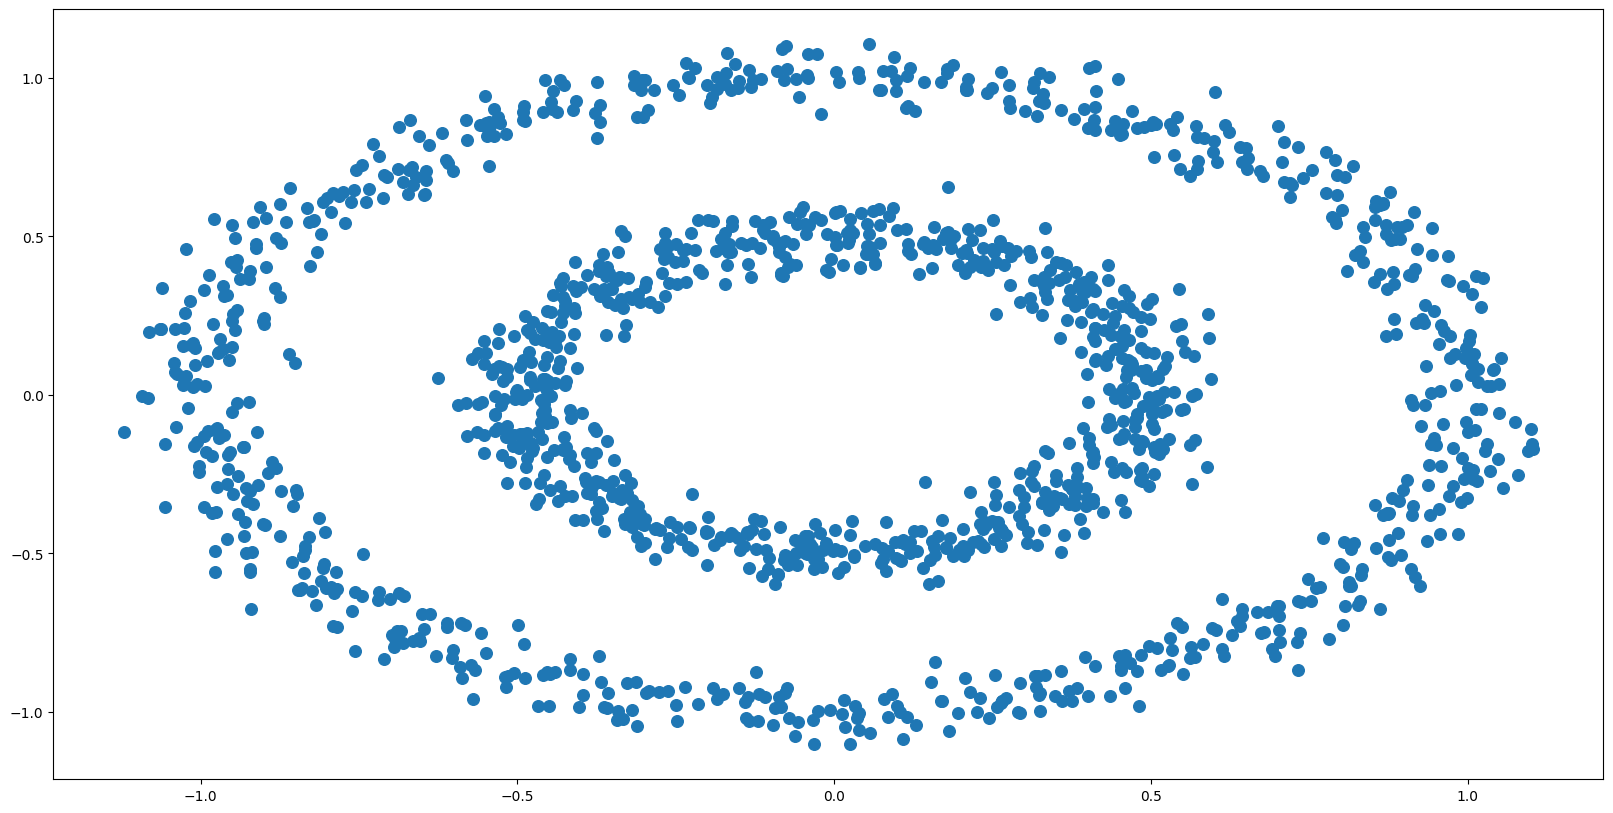

In [ ]:
# Lets visualize the toy datasets we have created
# Circles dataset
plt.figure(figsize=(20,10))
plt.scatter(X_circles[:,0], X_circles[:,1], cmap='Accent', s=70)
plt.show()

<ipython-input-5-2b0e72a9c781>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_moons[:,0], X_moons[:,1], cmap='Accent', s=70)


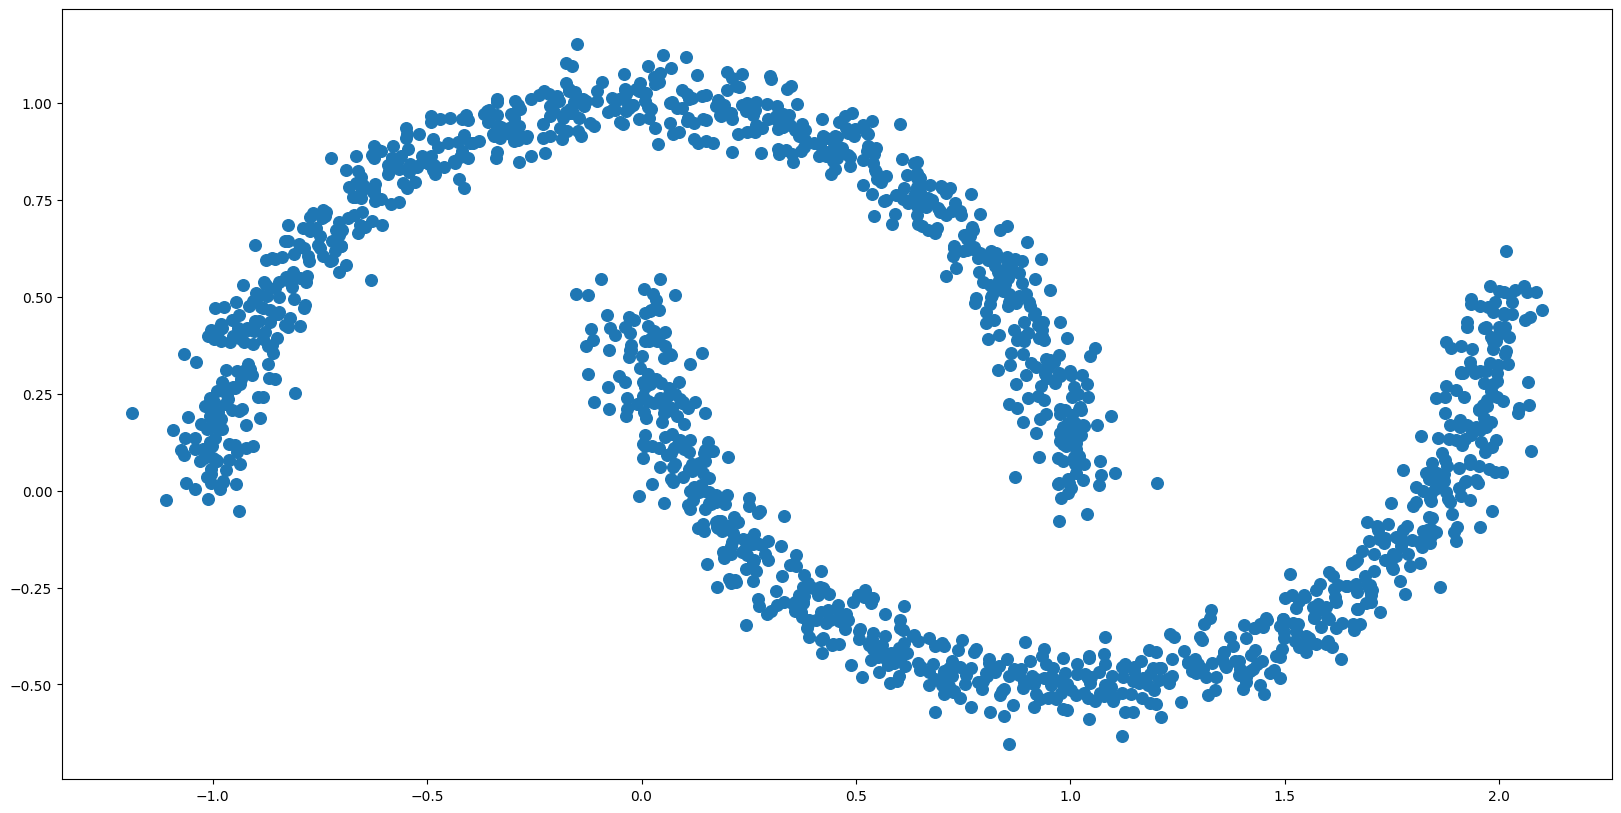

In [ ]:
# Moons dataset
plt.figure(figsize=(20,10))
plt.scatter(X_moons[:,0], X_moons[:,1], cmap='Accent', s=70)
plt.show()

<ipython-input-6-1b8b185ffc3e>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_blobs[:,0], X_blobs[:,1], cmap='Accent', s=70)


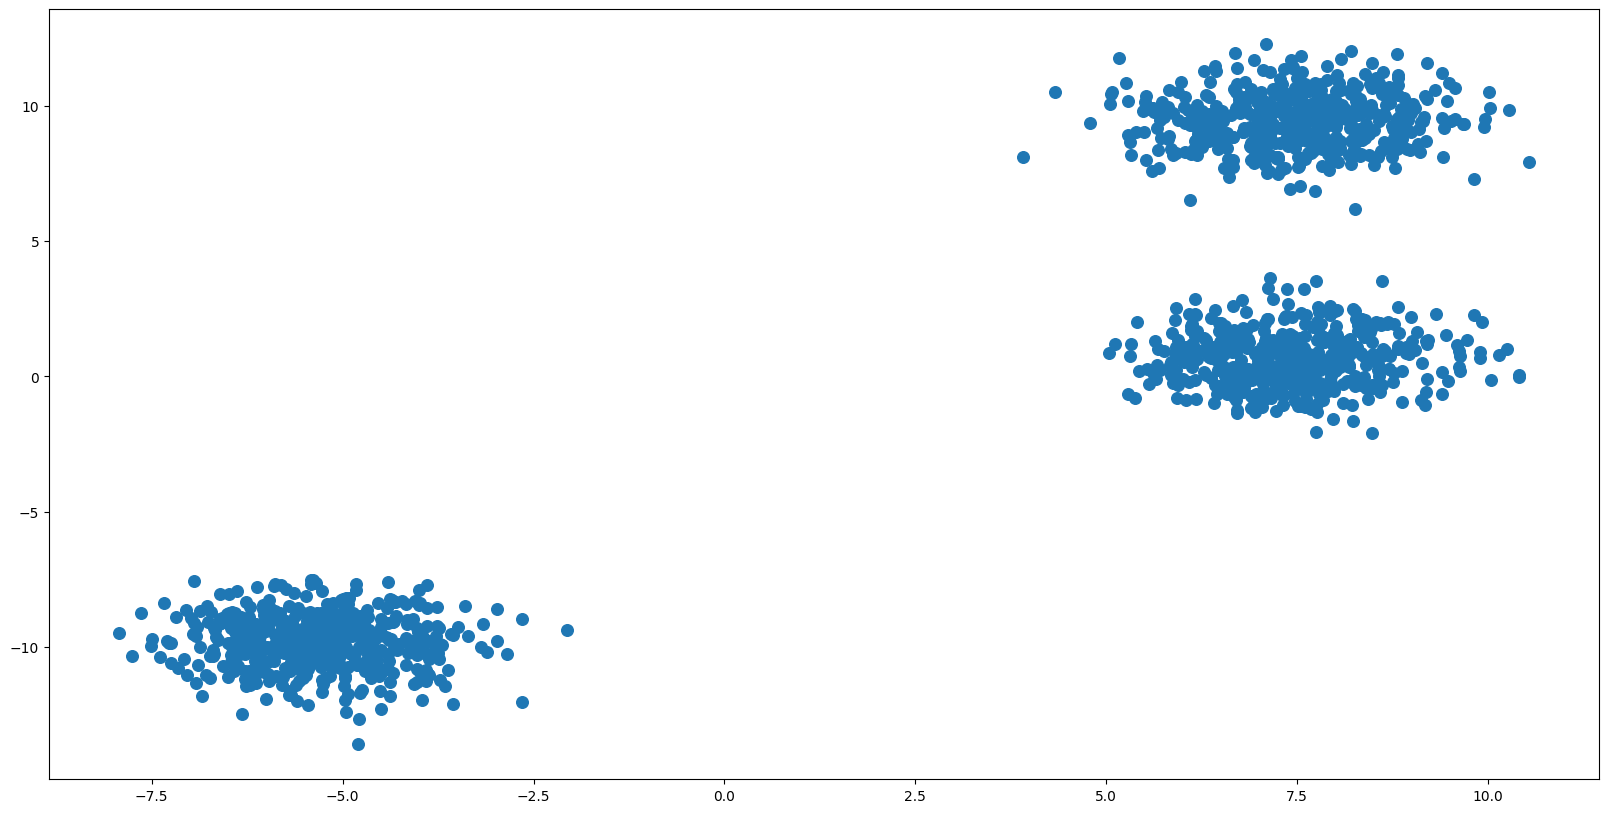

In [ ]:
# Blobs dataset
plt.figure(figsize=(20,10))
plt.scatter(X_blobs[:,0], X_blobs[:,1], cmap='Accent', s=70)
plt.show()

<ipython-input-7-c54073c9a750>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_no_structure[:,0], X_no_structure[:,1], cmap='Accent', s=70)


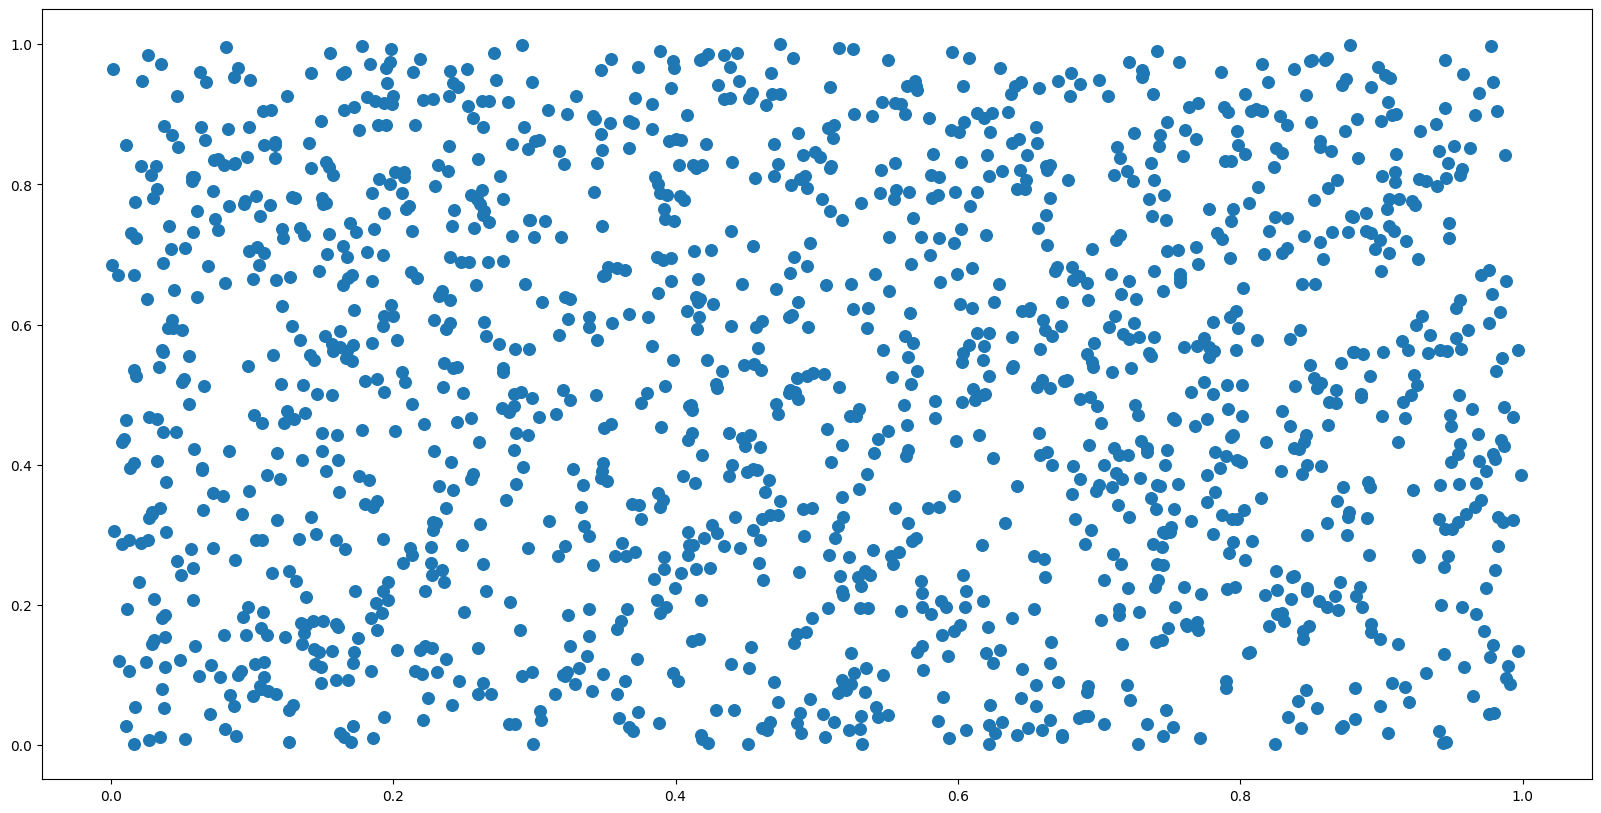

In [ ]:
# Uniform points (no_structure dataset)
plt.figure(figsize=(20,10))
plt.scatter(X_no_structure[:,0], X_no_structure[:,1], cmap='Accent', s=70)
plt.show()

<ipython-input-8-d19f8410b94c>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_aniso[:,0], X_aniso[:,1], cmap='Accent', s=70)


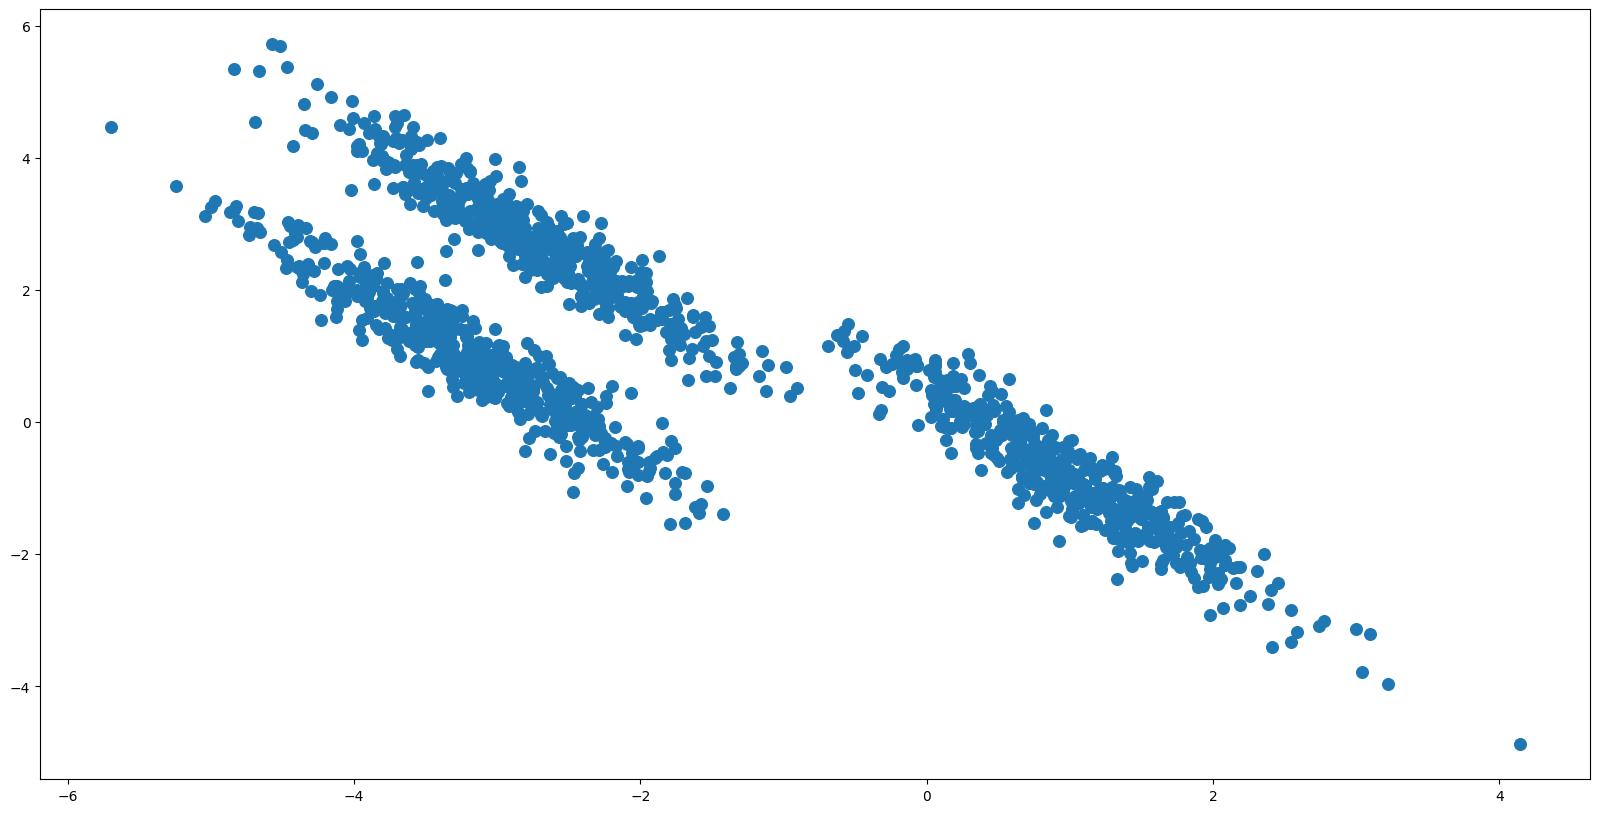

In [ ]:
# Dataset with points distributed along different axes
plt.figure(figsize=(20,10))
plt.scatter(X_aniso[:,0], X_aniso[:,1], cmap='Accent', s=70)
plt.show()

<ipython-input-9-0984eca82de0>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_varied[:,0], X_varied[:,1], cmap='Accent', s=70)


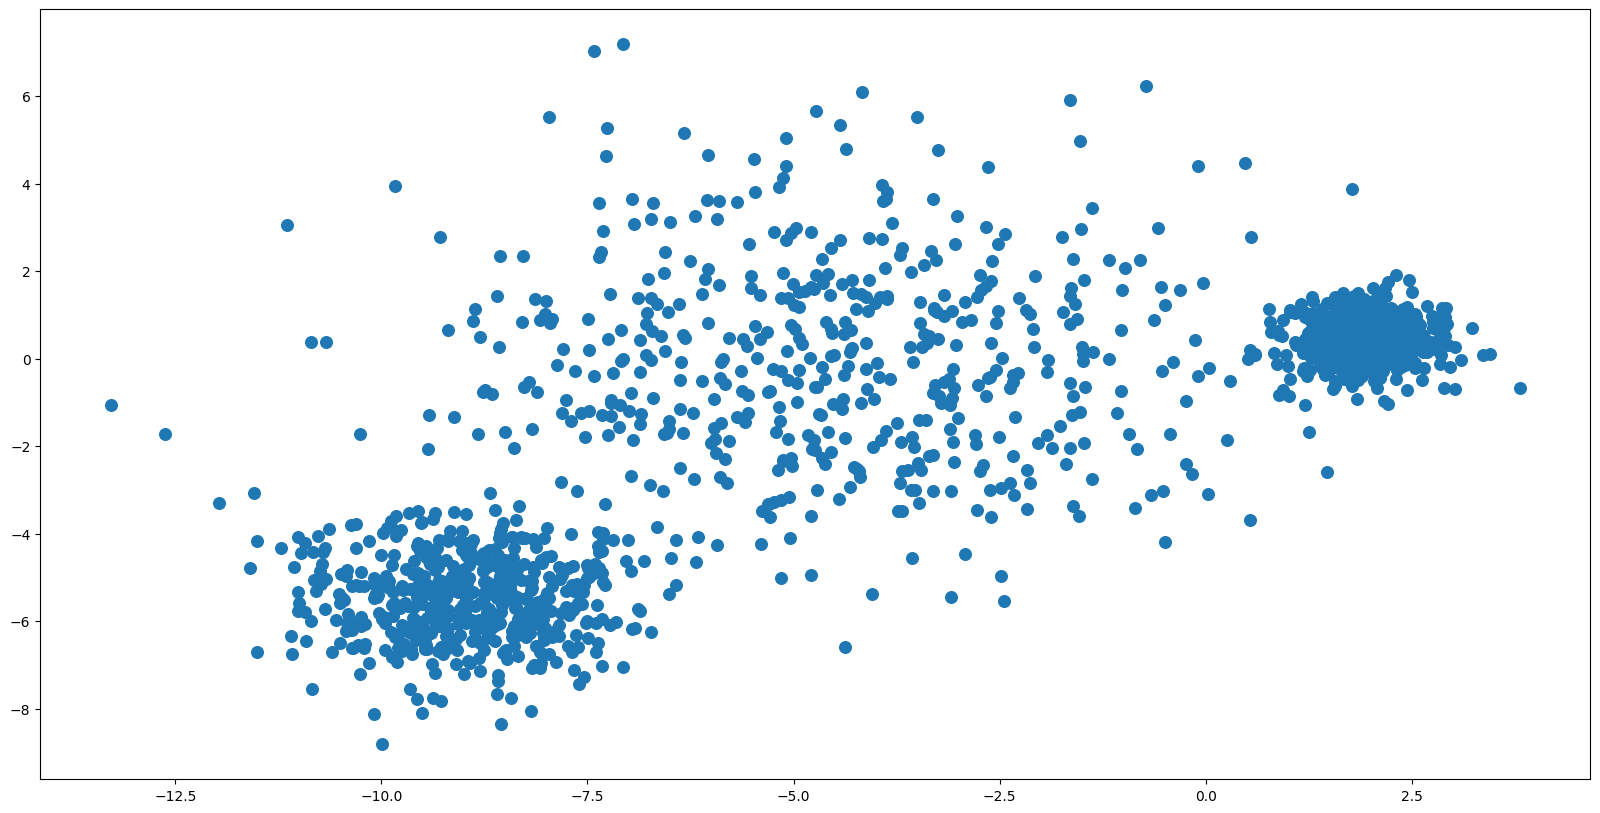

In [ ]:
# Blobs dataset with varied variances
plt.figure(figsize=(20,10))
plt.scatter(X_varied[:,0], X_varied[:,1], cmap='Accent', s=70)
plt.show()

In [ ]:
# In the next step we define some functions that we need.
# Define cluster_kmeans function
from sklearn.cluster import KMeans
from sklearn import metrics
# from sklearn.metrics import pairwise_distances

# silhouette: 1=good, 0=overlap, -1=bad
# Within Cluster Sum of Squares: lower is better

def cluster_kmeans(df, nclust):

    kmeans = KMeans(n_clusters=nclust, random_state=0).fit(df)
    label = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sil=metrics.silhouette_score(df, label, metric='euclidean', random_state=0)
    wcss = kmeans.inertia_

    return sil, wcss, label, centroids

In [ ]:
# Define cluster_agglom function
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
def cluster_agglom(df, nclust, link):

    hc = AgglomerativeClustering(n_clusters=nclust, metric = 'euclidean', linkage = link).fit(df)
    label = hc.labels_
    wcss, centroids = eval_WCSS(X, label)
    sil=metrics.silhouette_score(df, label, metric='euclidean', random_state=0)

    return sil, wcss, label, centroids

In [ ]:
# Define eval_WCSS function
def eval_WCSS(X, label):

    df = pd.DataFrame(data=X, index=label)
    centroids = df.groupby(level=0).mean()

    WCSS = 0
    for clust, centr in centroids.iterrows():

        points = df[df.index == clust]
        SS = 0
        for _, p in points.iterrows():
            SS += sum((p.values-centr.values)**2)
        WCSS += SS

    return WCSS, centroids.values

Circles dataset: Comparison of different clustering techniques

---





<ipython-input-13-fc05bcff40d3>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_circles[:,0], X_circles[:,1], cmap='Accent', s=70)


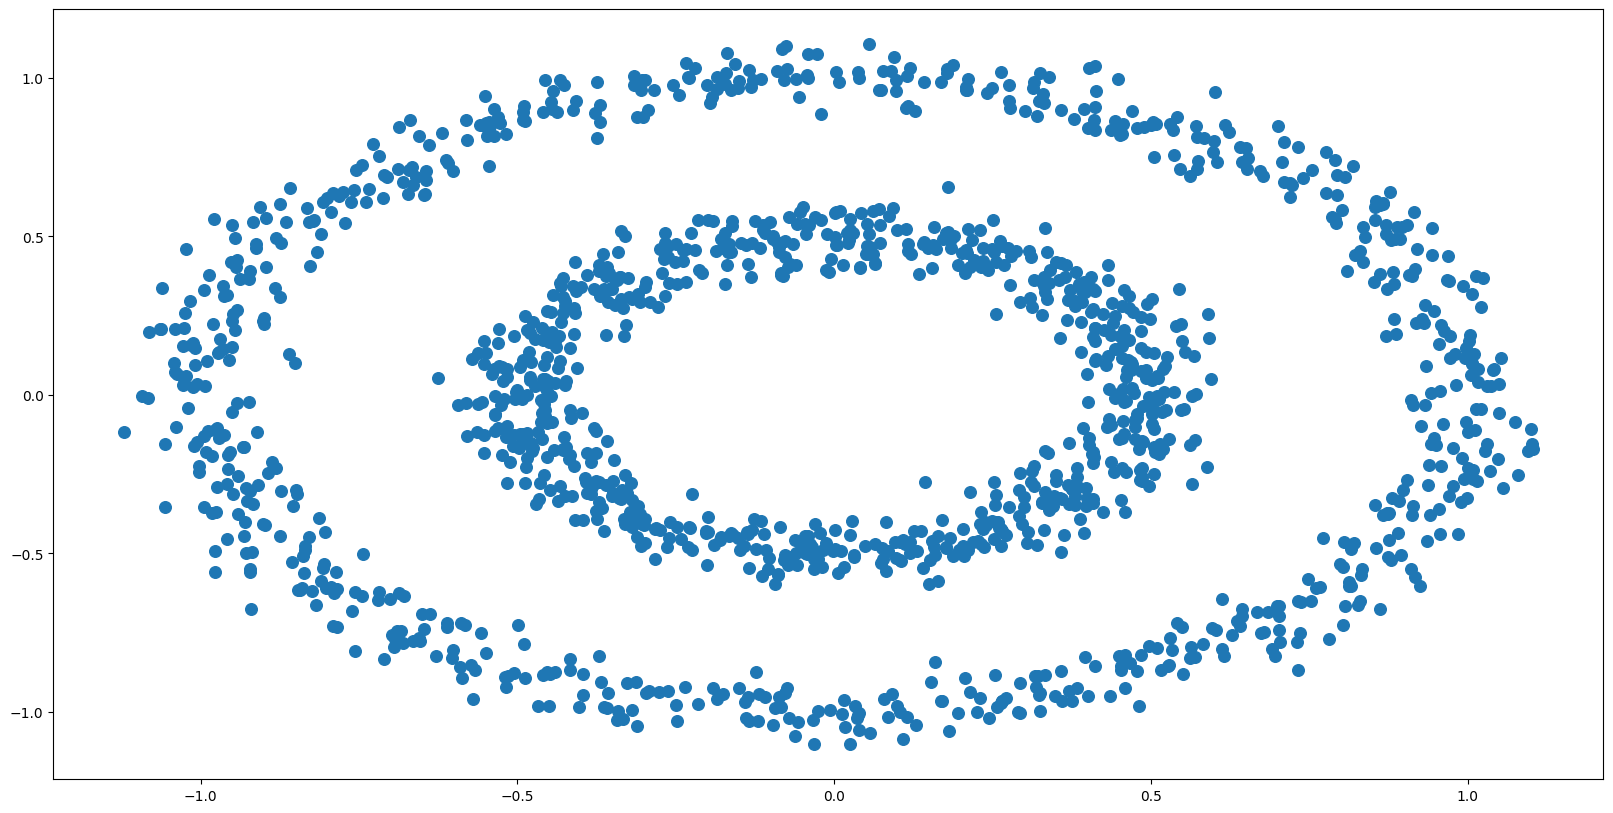

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_circles[:,0], X_circles[:,1], cmap='Accent', s=70)
plt.show()

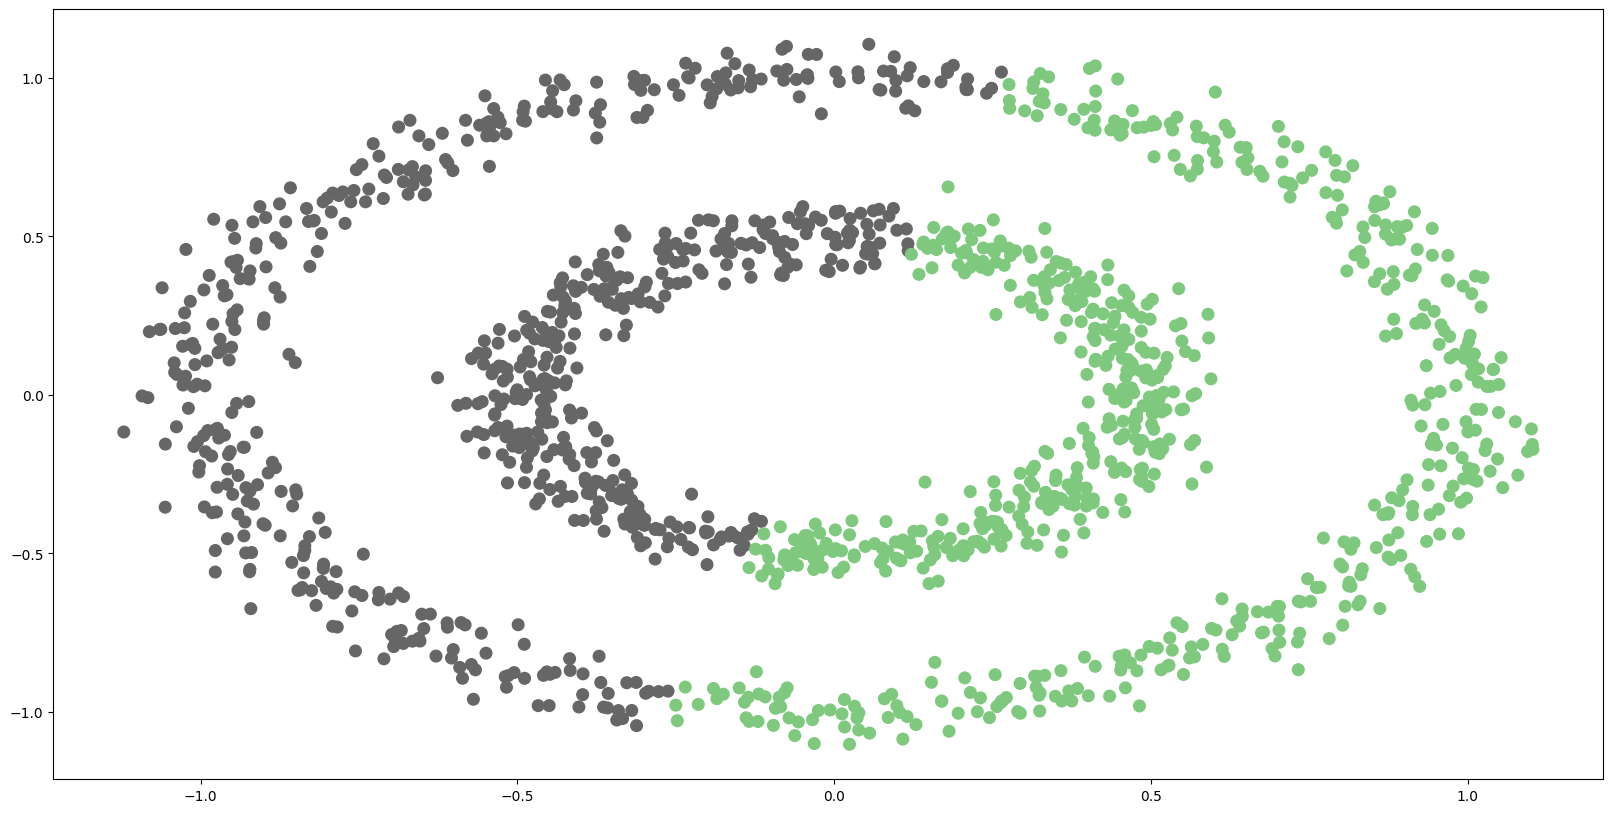

In [ ]:
# K-means
sil, wcss, label, centroids = cluster_kmeans(X_circles, 2)
plt.figure(figsize=(20,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=label, cmap='Accent', s=70)
plt.show()

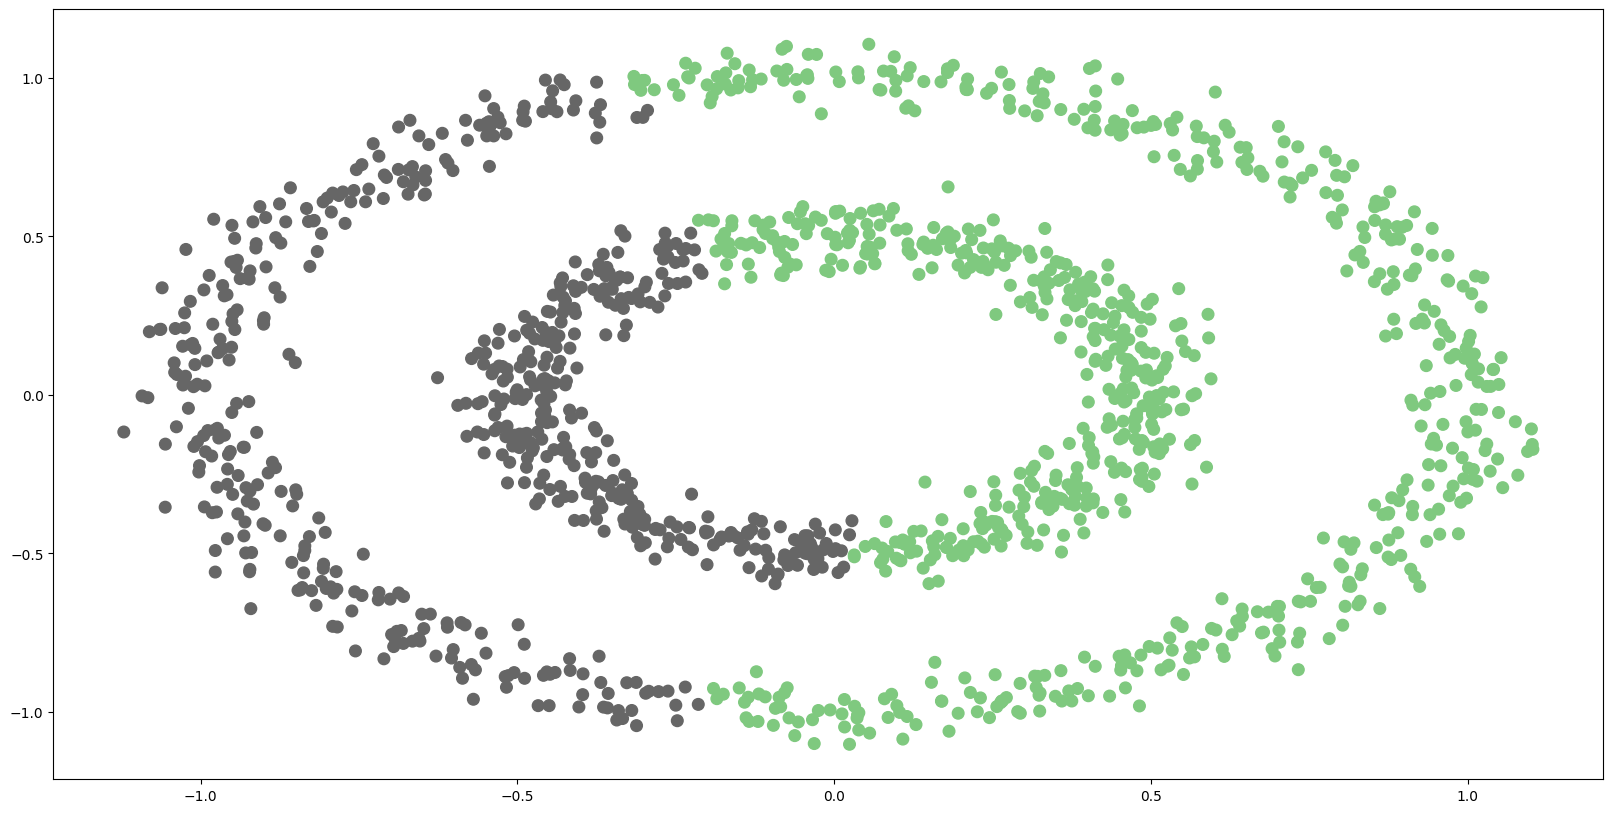

In [ ]:
# Agglomerative clustering: complete link
sil, wcss, label, centroids = cluster_agglom(X_circles, 2, link='complete')
plt.figure(figsize=(20,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=label, cmap='Accent', s=70)
plt.show()

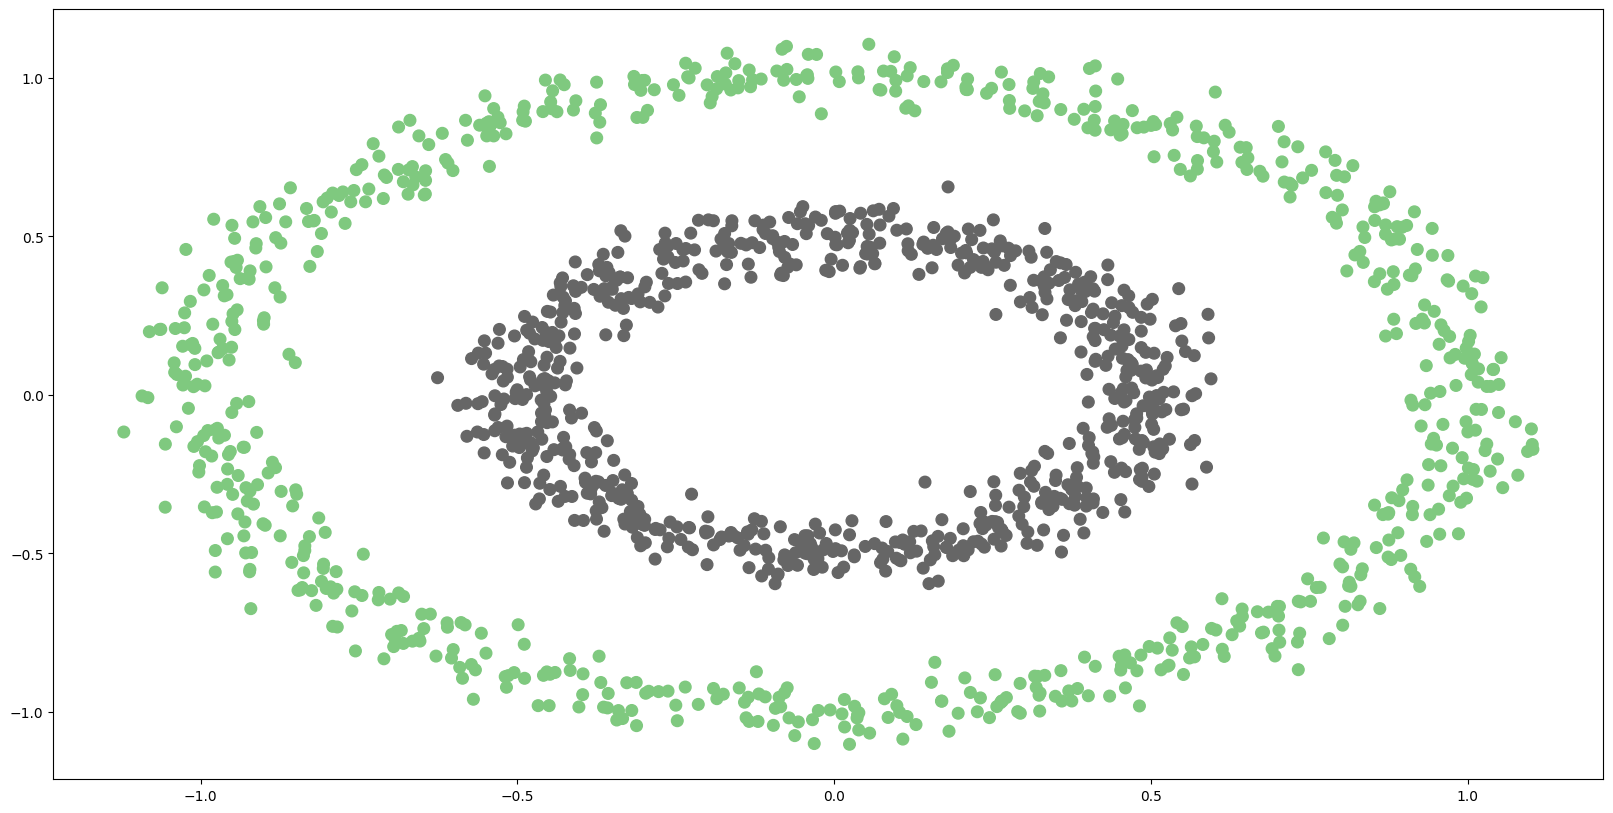

In [ ]:
# DBScan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2).fit(X_circles) # epsfloat, default=0.5 --> The maximum distance between two samples for one to be considered as in the neighborhood of the other.

label = db.labels_
plt.figure(figsize=(20,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: single link
sil, wcss, label, centroids = cluster_agglom(X_circles, 2, link='single')
plt.figure(figsize=(20,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=label, cmap='Accent', s=70)
plt.show()

Moons dataset: Comparison of different clustering techniques

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_moons[:,0], X_moons[:,1], cmap='Accent', s=70)
plt.show()

In [ ]:
# K-means
sil, wcss, label, centroids = cluster_kmeans(X_moons, 2)
plt.figure(figsize=(20,10))
plt.scatter(X_moons[:,0], X_moons[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: complete link
sil, wcss, label, centroids = cluster_agglom(X_moons, 2, link='complete')
plt.figure(figsize=(20,10))
plt.scatter(X_moons[:,0], X_moons[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# DBScan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2).fit(X_moons) # epsfloat, default=0.5 --> The maximum distance between two samples for one to be considered as in the neighborhood of the other.

label = db.labels_
plt.figure(figsize=(20,10))
plt.scatter(X_moons[:,0], X_moons[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: single link
sil, wcss, label, centroids = cluster_agglom(X_moons, 2, link='single')
plt.figure(figsize=(20,10))
plt.scatter(X_moons[:,0], X_moons[:,1], c=label, cmap='Accent', s=70)
plt.show()

Bloobs dataset: Comparison of different clustering techniques

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_blobs[:,0], X_blobs[:,1], cmap='Accent', s=70)
plt.show()

In [ ]:
# K-means
sil, wcss, label, centroids = cluster_kmeans(X_blobs, 3)
plt.figure(figsize=(20,10))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: complete link
sil, wcss, label, centroids = cluster_agglom(X_blobs, 3, link='complete')
plt.figure(figsize=(20,10))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# DBScan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5).fit(X_blobs) # epsfloat, default=0.5 --> The maximum distance between two samples for one to be considered as in the neighborhood of the other.

label = db.labels_
plt.figure(figsize=(20,10))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: single link
sil, wcss, label, centroids = cluster_agglom(X_blobs, 3, link='single')
plt.figure(figsize=(20,10))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=label, cmap='Accent', s=70)
plt.show()

No structure dataset: Comparison of different clustering techniques

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_no_structure[:,0], X_no_structure[:,1], cmap='Accent', s=70)
plt.show()

In [ ]:
# K-means
sil, wcss, label, centroids = cluster_kmeans(X_no_structure, 3)
plt.figure(figsize=(20,10))
plt.scatter(X_no_structure[:,0], X_no_structure[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: complete link
sil, wcss, label, centroids = cluster_agglom(X_no_structure, 3, link='complete')
plt.figure(figsize=(20,10))
plt.scatter(X_no_structure[:,0], X_no_structure[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# DBScan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1).fit(X_no_structure) # epsfloat, default=0.5 --> The maximum distance between two samples for one to be considered as in the neighborhood of the other.

label = db.labels_
plt.figure(figsize=(20,10))
plt.scatter(X_no_structure[:,0], X_no_structure[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: single link
sil, wcss, label, centroids = cluster_agglom(X_no_structure, 2, link='single')
plt.figure(figsize=(20,10))
plt.scatter(X_no_structure[:,0], X_no_structure[:,1], c=label, cmap='Accent', s=70)
plt.show()

Dataset with points distributed along different axes: Comparison of different clustering techniques

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_aniso[:,0], X_aniso[:,1], cmap='Accent', s=70)
plt.show()

In [ ]:
# K-means
sil, wcss, label, centroids = cluster_kmeans(X_aniso, 3)
plt.figure(figsize=(20,10))
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: complete link
sil, wcss, label, centroids = cluster_agglom(X_aniso, 3, link='complete')
plt.figure(figsize=(20,10))
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# DBScan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3).fit(X_aniso) # epsfloat, default=0.5 --> The maximum distance between two samples for one to be considered as in the neighborhood of the other.

label = db.labels_
plt.figure(figsize=(20,10))
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: single link
sil, wcss, label, centroids = cluster_agglom(X_aniso, 3, link='single')
plt.figure(figsize=(20,10))
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=label, cmap='Accent', s=70)
plt.show()

Blobs with different variance dataset: : Comparison of different clustering techniques

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_varied[:,0], X_varied[:,1], cmap='Accent', s=70)
plt.show()

In [ ]:
# K-means
sil, wcss, label, centroids = cluster_kmeans(X_varied, 3)
plt.figure(figsize=(20,10))
plt.scatter(X_varied[:,0], X_varied[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: complete link
sil, wcss, label, centroids = cluster_agglom(X_varied, 3, link='complete')
plt.figure(figsize=(20,10))
plt.scatter(X_varied[:,0], X_varied[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# DBScan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6).fit(X_varied) # epsfloat, default=0.5 --> The maximum distance between two samples for one to be considered as in the neighborhood of the other.

label = db.labels_
plt.figure(figsize=(20,10))
plt.scatter(X_varied[:,0], X_varied[:,1], c=label, cmap='Accent', s=70)
plt.show()

In [ ]:
# Agglomerative clustering: single link
sil, wcss, label, centroids = cluster_agglom(X_varied, 3, link='single')
plt.figure(figsize=(20,10))
plt.scatter(X_varied[:,0], X_varied[:,1], c=label, cmap='Accent', s=70)
plt.show()